In [ ]:
from keras.datasets import mnist
import numpy as np
(train_images,__),(test_images,_)=mnist.load_data()
print(train_images.shape)
print(test_images.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


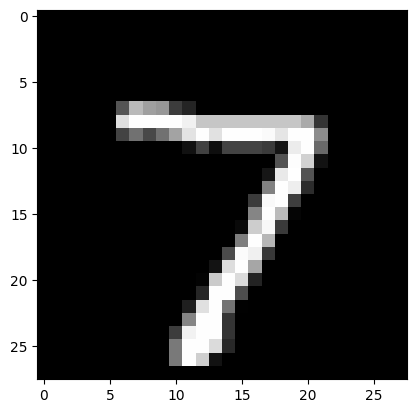

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_images[0].reshape(28,28))
plt.gray()

In [ ]:
train_images=train_images.astype('float32')/255.
test_images=test_images.astype('float32')/255.

In [ ]:
train_images=train_images.reshape((len(train_images),np.prod(train_images.shape[1:])))
test_images=test_images.reshape((len(test_images),np.prod(test_images.shape[1:])))
print(train_images.shape)
print(train_images.shape)

(60000, 784)
(60000, 784)


In [ ]:
from keras.layers import Input,Dense
from keras.models import Model
encoding_dim=32
input_layer=Input(shape=(784,))
encoder_layer1=Dense(encoding_dim,activation='relu')(input_layer)
decoder_layer=Dense(784,activation='sigmoid')(encoder_layer1)
autoencoder=Model(input_layer,decoder_layer)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
encoder=Model(input_layer,encoder_layer1)
encoded_input=Input(shape=(encoding_dim,))
decoder_layer=autoencoder.layers[-1]
decoder=Model(encoded_input,decoder_layer(encoded_input))

In [25]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [26]:

autoencoder.fit(train_images,train_images,
epochs=60,
batch_size=256,
shuffle=True,
validation_data=(test_images,test_images))

Epoch 1/60
235/235 [==============================] - 3s 10ms/step - loss: 0.2562 - val_loss: 0.1824
Epoch 2/60
235/235 [==============================] - 2s 9ms/step - loss: 0.1655 - val_loss: 0.1490
Epoch 3/60
235/235 [==============================] - 2s 9ms/step - loss: 0.1405 - val_loss: 0.1307
Epoch 4/60
235/235 [==============================] - 2s 9ms/step - loss: 0.1262 - val_loss: 0.1192
Epoch 5/60
235/235 [==============================] - 3s 13ms/step - loss: 0.1163 - val_loss: 0.1109
Epoch 6/60
235/235 [==============================] - 2s 9ms/step - loss: 0.1091 - val_loss: 0.1050
Epoch 7/60
235/235 [==============================] - 2s 9ms/step - loss: 0.1040 - val_loss: 0.1008
Epoch 8/60
235/235 [==============================] - 2s 9ms/step - loss: 0.1005 - val_loss: 0.0979
Epoch 9/60
235/235 [==============================] - 2s 9ms/step - loss: 0.0982 - val_loss: 0.0959
Epoch 10/60
235/235 [==============================] - 2s 9ms/step - loss: 0.0966 - val_loss: 0.09

In [27]:
encoded_imgs=encoder.predict(test_images)
print(encoded_imgs.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 32)


In [28]:
decoded_imgs=decoder.predict(encoded_imgs)
print(decoded_imgs.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 784)


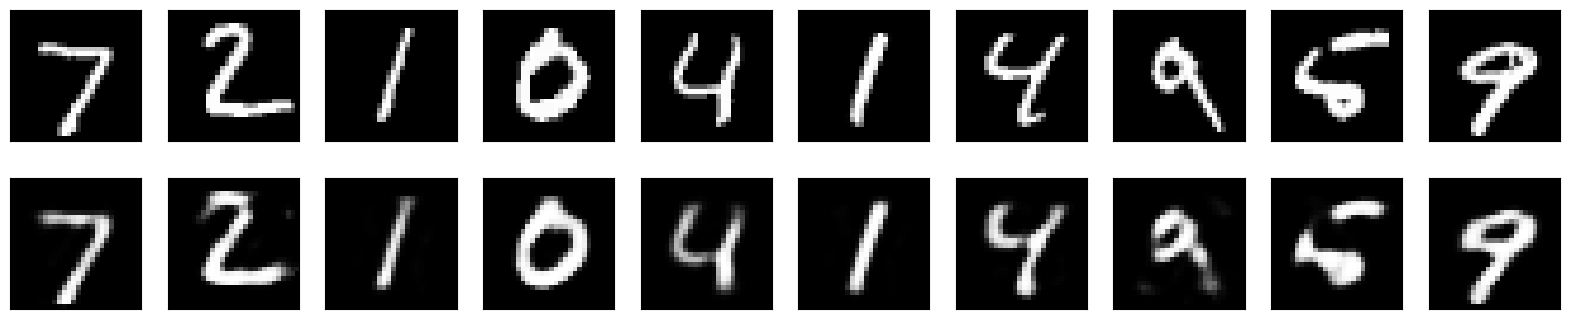

In [29]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()